In [1]:
#판다스 : 행렬 처리 라이브러리.
import pandas as pd

#씨본
import seaborn as sns

#넘파이
import numpy as np

#matplotlib
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
import platform

# 사용되는 라이브러리(패키지)
import folium

# Json
import json

### API만들기

from bs4 import BeautifulSoup
import requests
import pandas as pd
### 아래 import 후 lxml 실행 안되는 경우
from openpyxl.workbook import Workbook

#한글
if platform.system() == "Windows":
    path = "C:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc("font", family = font_name)
     
# OS가 MAC 일때 적용
elif platform.system() == "Darwin":
    rc("font", family = 'AppleGothic')

else:
    print("Check your ..")
#한글 처리
plt.rc("font", family = "malgun Gothic")

## 마이너스 기호 사용 설정
plt.rcParams["axes.unicode_minus"] = False

In [4]:
### 지출 금액 총액 : 신용카드, 체크카드, 스마트폰, 현금, 수표
### 화폐단위(환산), USD 기준
### 개별 여행객은 국제선 항공료/선박료를 제외한 금액을 기입
###17 18 19 모든 연도에 개별 여행은 10,000 이상 소비는 결측 처리, 단체 여행은 11,000 결측 처리.
### 2017년 사용 금액 변수는 "개인,총합","단체&에어텔"로 분할되어 있어서 주의가 필요

### 데이터 읽어오기
### 2017년
raw_2017 = pd.read_csv("../files/2017y_raw.csv")
                       
### 2018년
raw_2018 = pd.read_csv("./files/2018y_raw.csv")

### 2019년
raw_2019 = pd.read_csv("./files/2019y_raw.csv")


FileNotFoundError: [Errno 2] No such file or directory: '../01_raw데이터/2018년_원자료.csv'

### 연도별, 월별에 따른 여행 경비 총액

In [ ]:
### 2017,18,19년 외래관광객 실태조사 코드북 참고
### 원자료(최초 설문자료)에서 초과치(극단치)를 제외한 변수를 설정,선택
### 2017년
### 여행 전체 지출 ["wtzq19_1""], 개벌, 단체 합계
### 개별 여행객
## 개별 여행객 총지출, 카테고리별 (숙박,쇼핑, 식음료 등) 소비 코드



In [67]:
### 2017년 필요 데이터 추출과 저장
raw_2017_con = raw_2017[["chasu","nat","sex","age","wtzq19_1","wzq19a0","wzq19a1","wzq19a3","wzq19a4","wzq19a5",
"wzq19a6","wzq19a7","wzq19a8","wzq19a9","wzq19a10","wzq19b0","wzq19b2","wzq19b3","wzq19b4","wzq19b5","wzq19b6",
         "wzq19b7","wzq19b8","wzq19b9","wzq19b10"]]
raw_2017_con.to_excel("./savefiles/raw_2017_con_encol.xlsx")

In [68]:
### 2018년 필요 데이터 추출과 저장

raw_2018_con = raw_2018[["D_MON","D_COU","D_GEN","D_AGE","MQ14_1T","MQ14_2_1","MQ14_2_2","MQ14_2_3",
         "MQ14_2_4","MQ14_2_5","MQ14_2_6","MQ14_2_7","MQ14_2_8","MQ14_2_9"]]
raw_2018_con.to_excel("./savefiles/raw_2018_con_encol.xlsx")

In [69]:
### 2019년 필요 데이터 추출과 저장
raw_2019_con = raw_2019[["D_MON","D_COU1","D_GEN","D_AGE","MQ14_1T","MQ14_2_1","MQ14_2_2","MQ14_2_3",
         "MQ14_2_4","MQ14_2_5","MQ14_2_6","MQ14_2_7","MQ14_2_8","MQ14_2_9","MQ14_2_10"]]
raw_2019_con.to_excel("./savefiles/raw_2019_con_encol.xlsx")

In [ ]:
###변수 기준 통일을 위한 전처리
### 2017년 자료는 소비가 개인과 단체(에어텔)이 구분되어 있어 합쳐야하고
### 2017년 운동관련 지출은 2018, 2019에 기타로 편입, 2017년 운동 지출도 기타로 병합

## 2019년의 소비 카테고리에서 2019년 신설된 치료비 항목은 2017,2018 모두 없기 때문에 기타로 편입
## 2017년에는 통신비 항목이 없고, 소비 분석에 중요 변수로 사용하지 않을 예정이기에 2018,2019년 통신비도 기타로

In [70]:
raw_2017_con

,chasu,nat,sex,age,wtzq19_1,wzq19a0,wzq19a1,wzq19a3,wzq19a4,wzq19a5,...,wzq19b0,wzq19b2,wzq19b3,wzq19b4,wzq19b5,wzq19b6,wzq19b7,wzq19b8,wzq19b9,wzq19b10
0,3.0,1.0,2.0,0.0,480.975000,NaN,NaN,NaN,NaN,NaN,...,480.975,262.350,87.450,87.450,43.725,0.0,0.0,0.0,0.0,0.000
1,11.0,4.0,1.0,3.0,646.888000,646.888000,58.808,220.530000,147.020000,220.530000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.0,13.0,1.0,1.0,560.650000,560.650000,112.130,112.130000,112.130000,224.260000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,9.0,1.0,1.0,509.225468,509.225468,0.000,169.741823,169.741823,84.870911,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.0,9.0,1.0,2.0,409.000000,409.000000,84.000,25.000000,100.000000,50.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13836,12.0,1.0,2.0,2.0,711.920000,NaN,NaN,NaN,NaN,NaN,...,711.920,222.475,373.758,0.000,88.990,0.0,0.0,0.0,0.0,26.697
13837,12.0,1.0,2.0,4.0,854.304000,NaN,NaN,NaN,NaN,NaN,...,854.304,320.364,444.950,44.495,0.000,0.0,0.0,0.0,0.0,44.495
13838,12.0,1.0,1.0,4.0,311.465000,311.465000,106.788,106.788000,71.192000,26.697000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13839,12.0,1.0,2.0,4.0,649.627000,NaN,NaN,NaN,NaN,NaN,...,649.627,320.364,222.475,62.293,0.000,0.0,0.0,0.0,0.0,44.495


In [ ]:
# 단체는 wzq19b2, 거주국 여행사 지불 경비로 처리

# 01. 숙박비 wzq19a1 에어텔은 숙박비 안잡힘
# 02. 쇼핑비 wzq19a3 + wzq19b3
# 03. 식음료비 wzq19a4 + wzq19b4
# 04. 현지 교통비 wzq19a5 + wzq19b5
# 05. 한국 여행사 지출 wzq19a7 + wzq19b7
# 06. 문화 관련 지출 wzq19a8 + wzq19b8 + wzq19a6 + wzq19b6(208,2019 문화 오락 관련 지출로 병합)
# 07. 기타비용 wzq19a10 + wzq19b10 + wzq19a9 + wzq19b9 (운동관련 지출 2018,2019 기타에 포함)
# 00. 거주국 여행사 지불 경비 wzq19b2


In [ ]:
# 2018년
# 01. 숙박비 MQ14_2_1
# 02. 쇼핑비 MQ14_2_3
# 03. 식음료비 MQ14_2_4
# 04. 현지 교통비 MQ14_2_5
# 05. 한국 여행사 지출 MQ14_2_6
# 06. 문화 오락 관련 지출  MQ14_2_7
# 07. 기타비용 MQ14_2_9 + MQ14_2_8(데이터 통신비는 기타 비용으로 병합)

# 00.거주국 여행사에 지불 MQ14_2_2

In [ ]:
# 2019년
# 01. 숙박비 MQ14_2_1
# 02. 쇼핑비 MQ14_2_3
# 03. 식음료비 MQ14_2_4
# 04. 현지 교통비 MQ14_2_5
# 05. 한국 여행사 지출 MQ14_2_6
# 06. 문화 오락 관련 지출  MQ14_2_7
# 07. 기타비용 MQ14_2_10+MQ14_2_9(2019년 치료비용은 기타로 병합)+MQ14_2_8(통신비 기타에 병합)
# 00. 거주국 여행사에 지불 MQ14_2_2

In [ ]:
### 추출할 컬럼명 통일 ## 코드 날림....
##["D_MON","D_COU","D_GEN","D_AGE", "total_"]

In [ ]:
### 컬럼명 한글로 변경
### 코드 - 한글 병기한 파일 불러오기
file_path2 ="./files/incol.xlsx"
df_hancol = pd.read_excel(file_path2)

### 빈 딕셔너리를 만들고
### key : 기존 컬럼, value : 변경 컬럼으로 지정해 for문으로 입력

handic = {}

for coidx in range(0,59,1):
    encol = df_hancol_edit.columns[coidx]
    hancol = df_hancol_edit.iloc[0][coidx] 

    handic[encol]=hancol # 딕셔너리에 key와 value를 지정해 추가한다.
    
handic

#replace의 인자에 딕셔너리를 입력하는 방식으로 컬럼 일괄 변경 가능
df.replace({dict})

### 추가 예시 국가별 코드를 국가 명으로 변경하기.
#값 대체 전 replace를 사용해 일괄 대체를 하기 위해서 dict 형태의 자료 생성
#조회를 통해 값을 확인
# df_ori_edit["국가별"]

#새로운 dict 생성
nation_name = {1:"일본",2:"중국",3:"홍콩",4:"싱가포르",5:"대만",6:"태국",7:"말레이시아",8:"호주",
               9:"미국",10:"캐나다",11:"영국",12:"독일",13:"프랑스",14:"러시아",15:"중동",16:"인도",
               17:"필리핀",18:"인도네시아",19 :"베트남",97:"기타"}

df_ori_edit["국가별"] = df_ori_edit["국가별"].replace(nation_name)
### 실행하면 for 문 없이도 알아서 key값을 매칭해가면서 value로 변경.
## 이상 유무 확인 및 값 확인
# df_ori_edit["국가별"].value_counts()

# 그룹별 합계/평균

In [ ]:
# df_edit = df.groupby("그룹화를 원하는 컬럼명")
# df_edit[그룹별로 추출이 필요한 항목].sum() or mean() 홀용 가능
# 예시
## df_edit = df.groupby("국적")
## df_edit[관광객_지출_총액].sum() : "관광객_지출_총액"의 합을, 국적별로 그룹화 해서 출력하라.
## 각각 출력 항목을 모두 csv or excel로 변경하여 데이터의 변형을 방지함.

##저장 예시
"""
df_nation_group_mean_to = pd.DataFrame(nation_group["1인 평균 지출_총액"].mean().round(2))
df_nation_group_mean_t.to_csv("./editsave/df_nation_group_mean_t.csv")
df_nation_group_mean_2017 = pd.DataFrame(nation_group_2017["1인 평균 지출_총액"].mean().round(2))
df_nation_group_mean_2017.to_csv("./editsave/df_nation_group_mean_2017.csv")
df_nation_group_mean_2018 = pd.DataFrame(nation_group_2018["1인 평균 지출_총액"].mean().round(2))
df_nation_group_mean_2018.to_csv("./editsave/df_nation_group_mean_2018.csv")
df_nation_group_mean_2019 = pd.DataFrame(nation_group_2019["1인 평균 지출_총액"].mean().round(2))
df_nation_group_mean_2019.to_csv("./editsave/df_nation_group_mean_2019.csv")
"""


### 추이 변화 확인을 위한 막대 그래프 생성

In [ ]:
# 그래프 크기 설정
plt.rcParams["figure.figsize"]=(20,10)

# X축 레이블 회전 각도 설정
plt.xticks(rotation=45)

# X축 제목, 폰트 사이즈 설정
plt.xlabel("년/월/일" ,fontdict = {'fontsize': 20})

# Y축 제목, 폰트 사이즈 설정
# ylim을 통해 y값의 범주를 설정하면, 패키지에서 자동으로 자알~ 나눠줌
plt.ylabel("평균 지출 총액(USD,$), 단위 : 백만" ,fontdict = {'fontsize': 20})
plt.ylim([0, 2000000])

#전체 그래프 제목 설정
plt.title("2017년, 2018년, 2019년 외래 입국객 지출 총액 추이",fontdict = {'fontsize': 30})

#그래프 격자 추가.
plt.grid()

#errwidth로 그래프 막대 간격 설정.
sns.barplot(data= ["데이터 프레임명"],errwidth=0)

### 히트맵 생성

In [ ]:
### 히트맵 사용전 x, y, value값을 설정하기 위해
### 피벗 테이블 설정
### "X축"에는 월을 "Y축"에는 년도를 값은 "소비액", 표시 방법은 합계
pivot_ssum = pd.pivot_table(pivot_ssum,index = "년도", columns = "월", values = "소비액", aggfunc="sum" )
pivot_ssum.to_excel("./editsave/pivot_ssssum.xlsx")

## 피벗테이블을 불러와 히트맵 생성
#sns.heatmap(피벗테이블명,히트맵 칸별 간격,
#            annot = False, 값의 표시 여부 디폴트가 False, True면 표시, annot_kws = {'size':4}를 통해서 annot,
#            크기 지정.)

sns.heatmap(pivot_ssum,linewidths = 0.5, annot = False, annot_kws = {'size':4})
plt.rcParams["figure.figsize"]=(20,10)

plt.xlabel("월", fontdict = {'fontsize': 20})
plt.ylabel("년도" , fontdict = {'fontsize': 20})
plt.title("각 년도에 따른 월별 총 소비액 비교",fontdict = {'fontsize': 30})

### 추이 확인을 위한 선 그래프 중첩

In [ ]:
## 데이터는 각각의 피벗 테이블에서 가져옴

sns.lineplot(pivot_sum_2017, x = "월", y = "소비", label = "2017년")
sns.lineplot(pivot_sum_2018, x = "월", y = "소비",label = "2018년")
sns.lineplot(pivot_sum_2019, x = "월", y = "소비",label = "2019년")

##범례 위치, "upper conter : 위쪽 가운데, upper right : 위쪽의 오른쪽" 등

plt.legend(fontsize=16,loc="upper left")

plt.xlabel("월", fontdict = {'fontsize': 20})
plt.ylabel("월별 총 소비액" , fontdict = {'fontsize': 20})
plt.title("각 년도에 따른 월별 총 소비액 비교",fontdict = {'fontsize': 30})

# hue를 이용한 막대 그래프

Text(0.5, 1.0, '성별에 따른 소비액 합계')

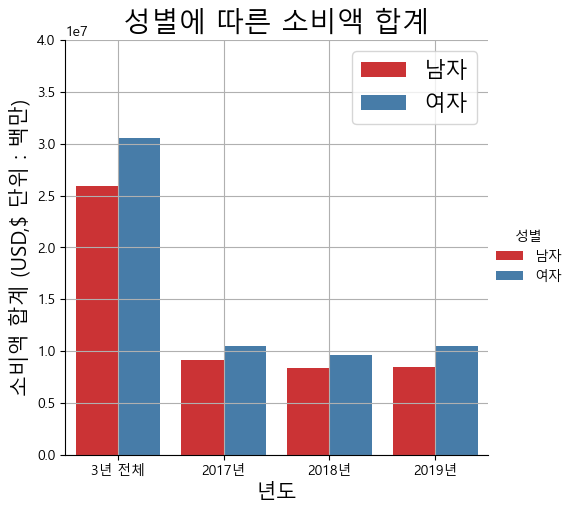

In [74]:
temp_list = [["3년 전체", "남자", 25951405.59], 
             ["3년 전체", "여자", 30582328.84],
            ["2017년", "남자", 9145136.0], 
             ["2017년", "여자", 10532967.53],
             ["2018년", "남자", 8342675.08], 
             ["2018년", "여자", 9592289.27],
             ["2019년", "남자", 8463594.51], 
             ["2019년", "여자", 10457072.04]]
temp_df = pd.DataFrame(temp_list, columns=["년도", "성별", "소비액"])
temp_df

# 전체 그래프 크기 지정
plt.rcParams["figure.figsize"]=(20,10)

#막대 그래프 생성(x= x축, y=y축, palette = 색상 성절, hue = '분류하고하는 카테고리')
sns.catplot(x='년도', y='소비액', palette = 'Set1',hue='성별', kind='bar', data=temp_df)

#아래 설정은 위의 막대그래프에서 설명
plt.ylim([0, 40000000])
plt.xlabel("년도", fontdict = {'fontsize': 15})
plt.ylabel("소비액 합계 (USD,$ 단위 : 백만)" , fontdict = {'fontsize': 15})
plt.grid()

### 범례의 추가
### bbox_to_anchor(x, y, width, height) 로 직접 범례 위치 설정가능
### (x,y)의 값이 1보다 작을 때 그래프 안으로 1보다 값이 클 때 그래프 밖으로
##(0,0)은 왼쪽 아래 구석, (1,1) 일때 오른쪽 위
plt.legend(fontsize=16,bbox_to_anchor=(1, 1))
    
plt.title("성별에 따른 소비액 합계", fontdict = {'fontsize': 20})

### 그룹화해서 정리한 합계 혹은 평균값에 대한 상위,하위값 추출

In [ ]:
### df의 값을 .sort_values("컬럼명",ascending = False) 를 사용해서 정렬
### ascending = False : 내림차순
### ascending = True : 올림차순

df_top = df.sort_values("소비액", ascending = False)
# 새 데이터 프레임에 담고
# 새 데이터 프레임에 .head(5) 를 이용해 상위 5개 값 추출
# tail.(5)는 하위값 5개 추출
df_top.head(5)
df_top.tail(5)
